In [105]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Load data
train_raw = pd.read_csv("Data/train.csv")
test_raw = pd.read_csv("Data/test.csv")

In [106]:
# Number of observations and features
print train_raw.shape
print test_raw.shape

(76020, 371)
(75818, 370)


Dataset consists of training and test sets provided by Kaggle. Each have 369 features and ID. Training set has an additional column, TARGET, containing the correct classifications. Training set has 76 020 observations and test set has 75 818 observations.

In [107]:
# Variable names and types
print train_raw.dtypes.value_counts()
print train_raw.columns

int64      260
float64    111
dtype: int64
Index([u'ID', u'var3', u'var15', u'imp_ent_var16_ult1',
       u'imp_op_var39_comer_ult1', u'imp_op_var39_comer_ult3',
       u'imp_op_var40_comer_ult1', u'imp_op_var40_comer_ult3',
       u'imp_op_var40_efect_ult1', u'imp_op_var40_efect_ult3',
       ...
       u'saldo_medio_var33_hace2', u'saldo_medio_var33_hace3',
       u'saldo_medio_var33_ult1', u'saldo_medio_var33_ult3',
       u'saldo_medio_var44_hace2', u'saldo_medio_var44_hace3',
       u'saldo_medio_var44_ult1', u'saldo_medio_var44_ult3', u'var38',
       u'TARGET'],
      dtype='object', length=371)


Data is anonymised, and variable names apart from ID and TARGET are rather cryptic. More information on their meaning is not available on Kaggle site either. 258 variables (ID and TARGET excluded) are integers, possibly presenting categorical data, and 111 variables are numerical. 

In [108]:
# Missing values (null)
print train_raw.isnull().sum().sum()
print test_raw.isnull().sum().sum()

0
0


Datasets do not contain missing values.

In [109]:
# Descriptive statistics on TARGET
print train_raw['TARGET'].describe()
print ""
print train_raw['TARGET'].value_counts()
print train_raw['TARGET'].value_counts() / train_raw.shape[0]

count    76020.000000
mean         0.039569
std          0.194945
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: TARGET, dtype: float64

0    73012
1     3008
Name: TARGET, dtype: int64
0    0.960431
1    0.039569
Name: TARGET, dtype: float64


Most of the customers are satisfied. Only 3.96 % of customers are unsatisfied. TARGET is thus inbalanced in that most of the cases come from single class. This might present a challenge in evaluating prediction results, as even a naive classifier predicting always the more common class could get an impressive looking 96 % accuracy.

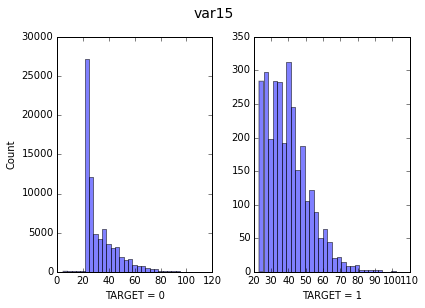

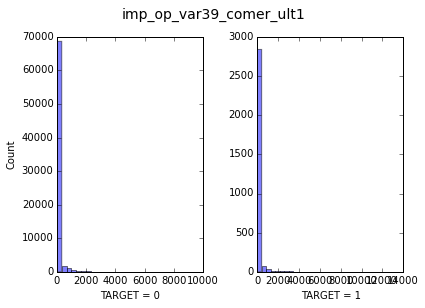

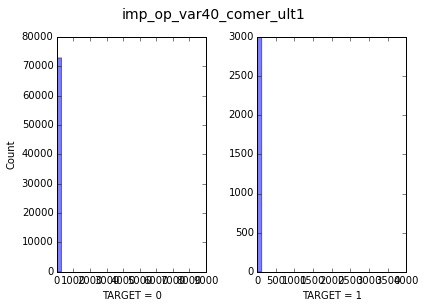

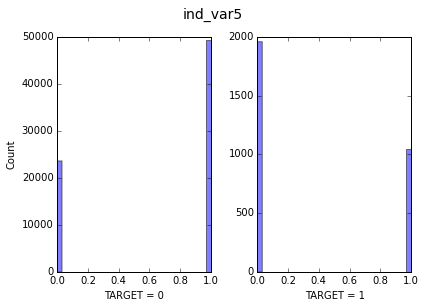

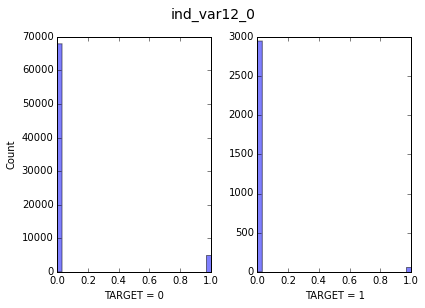

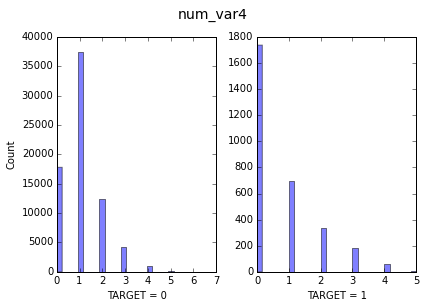

In [110]:
# Histograms and descriptive statistics of some typical variables
typical = ['var15', 'imp_op_var39_comer_ult1',
           'imp_op_var40_comer_ult1', 'ind_var5', 
           'ind_var12_0', 'num_var4']

# Histograms
for colname in typical:
    # Set up figure and two subplots
    fig = plt.figure(1)
    fig1 = fig.add_subplot(1,2,1)
    fig2 = fig.add_subplot(1,2,2)
    
    # Subset data by TARGET value
    x = train_raw[colname][train_raw['TARGET'] == 0].values
    y = train_raw[colname][train_raw['TARGET'] == 1].values
    
    # Create histograms
    fig1.hist(x, bins=30, alpha=0.5)
    fig2.hist(y, bins=30, alpha=0.5)
    
    # Set axis labels
    fig1.set_xlabel("TARGET = 0")
    fig2.set_xlabel("TARGET = 1")
    fig1.set_ylabel('Count')
    
    # Set figure title
    st = fig.suptitle(colname, fontsize=14)
    
    # Adjust layout
    st.set_y(1.05)
    fig.tight_layout()
    
    plt.show()

In [111]:
# Descriptive statistics
print train_raw[typical].describe()


              var15  imp_op_var39_comer_ult1  imp_op_var40_comer_ult1  \
count  76020.000000             76020.000000             76020.000000   
mean      33.212865                72.363067                 3.559130   
std       12.956486               339.315831                93.155749   
min        5.000000                 0.000000                 0.000000   
25%       23.000000                 0.000000                 0.000000   
50%       28.000000                 0.000000                 0.000000   
75%       40.000000                 0.000000                 0.000000   
max      105.000000             12888.030000              8237.820000   

           ind_var5   ind_var12_0      num_var4  
count  76020.000000  76020.000000  76020.000000  
mean       0.663760      0.067522      1.079440  
std        0.472425      0.250925      0.909566  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000  
50%        1.000000      0.000000      1.0

Histograms show different types of variables found in the dataset, grouped by TARGET value. There are numerical variables with skewed distributions. Depending on the learning algorithm normalizing them might be necessary. Many of the variables are integer variables, and of those several are actually binary variables. On visual inspection of histograms it is difficult to find variables where difference between TARGET values would be striking. Difference between classes is therefore likely to reside in interaction between several variables, which makes visual exploratory investigation of relationships challenging when there is several hundred features. Main use for data exploration in this case is therefore identifying possible errors in variables and data points.

In [112]:
# Descriptive statistics of suspicious variables

# Suspicious variables
suspicious = ['var3', 'delta_num_compra_var44_1y3', 'delta_num_reemb_var13_1y3',
              'delta_num_reemb_var17_1y3', 'delta_num_reemb_var33_1y3',
              'delta_num_trasp_var17_in_1y3', 'delta_num_trasp_var17_out_1y3',
              'delta_num_trasp_var33_in_1y3', 'delta_num_trasp_var33_out_1y3',
              'delta_num_venta_var44_1y3', 'num_var2_0_ult1',
              'num_var2_ult1', 'num_reemb_var13_hace3',
              'num_trasp_var17_out_hace3', 'num_trasp_var33_out_hace3',
              'saldo_medio_var13_medio_hace3']
print train_raw[suspicious].describe()

                var3  delta_num_compra_var44_1y3  delta_num_reemb_var13_1y3  \
count   76020.000000                7.602000e+04               7.602000e+04   
mean    -1523.199277                9.208103e+06               4.998685e+06   
std     39033.462364                3.033108e+08               2.235230e+08   
min   -999999.000000               -1.000000e+00               0.000000e+00   
25%         2.000000                0.000000e+00               0.000000e+00   
50%         2.000000                0.000000e+00               0.000000e+00   
75%         2.000000                0.000000e+00               0.000000e+00   
max       238.000000                1.000000e+10               1.000000e+10   

       delta_num_reemb_var17_1y3  delta_num_reemb_var33_1y3  \
count               7.602000e+04               7.602000e+04   
mean                2.630887e+06               1.315443e+05   
std                 1.621798e+08               3.626904e+07   
min                -1.000000e+00    

Exploring descriptive statistics and histograms of all features revealed above features as suspicious. They contain either a few suspiciously large and round values (e.g. -999999, when all other datapoints are positive), or have zero variance, making them useless for differentiating between TARGET classes.

In [113]:
# Count number of values less than 0 in var3
print train_raw['var3'][train_raw['var3'] < 0].value_counts()
print "\n"

# Value counts for other suspicious variables
for colname in suspicious:
    if colname is not 'var3':
        print train_raw[colname].value_counts()
        print "\n"

-999999    116
Name: var3, dtype: int64


 0.000000e+00    75923
 1.000000e+10       70
-1.000000e+00       18
 1.000000e+00        3
 4.000000e+00        2
-3.333333e-01        1
-6.666667e-01        1
 2.500000e+00        1
 5.000000e-01        1
Name: delta_num_compra_var44_1y3, dtype: int64


0             75982
9999999999       38
Name: delta_num_reemb_var13_1y3, dtype: int64


 0             75999
 9999999999       20
-1                 1
Name: delta_num_reemb_var17_1y3, dtype: int64


0             76019
9999999999        1
Name: delta_num_reemb_var33_1y3, dtype: int64


 0             76014
 9999999999        4
-1                 2
Name: delta_num_trasp_var17_in_1y3, dtype: int64


0             76016
9999999999        4
Name: delta_num_trasp_var17_out_1y3, dtype: int64


 0             76009
-1                 6
 9999999999        5
Name: delta_num_trasp_var33_in_1y3, dtype: int64


0             76019
9999999999        1
Name: delta_num_trasp_var33_out_1y3, dtype: int64


 0.

Further exploration of suspicious variables reveals they contain mostly zeros or a few extremely large values. They are not usable for prediction, and can thus be safely removed, except maybe for var3. After removing extreme values that are likely errors in data, var3 might be useful. var3 is fixex by imputing median value to suspicious data points.

In [114]:
# Fix var3 extreme values by changing them to median values
var3_median = train_raw["var3"].median()
train_raw.loc[train_raw['var3'] < 0, "var3"] = var3_median

# Remove columns with suspicious values, except for var3
suspicious.remove("var3")           # Remove var3 from removal list

# Drop suspicious columns
train_raw.drop(suspicious, axis=1)
test_raw.drop(suspicious, axis=1)
print "Removed %s suspicious colums." % str(len(suspicious))

# Remove any additional columns with no variance
remove = []
for colname in train_raw:
    if train_raw[colname].std() == 0:
        remove.append(colname)
        
train_raw = train_raw.drop(remove, axis=1)
test_raw = test_raw.drop(remove, axis=1)
print "Removed %s zero variance columns." % str(len(remove))

# Remove possible duplicated columns
cols_orig = train_raw.shape[1]
train_raw = train_raw.drop_duplicates()
test_raw = test_raw.drop_duplicates()
cols_removed = cols_orig - train_raw.shape[1]
print "Removed %s duplicated columns." % str(cols_removed)

print "Training set dimensions: " + str(train_raw.shape)
print "Test set dimensions:     " + str(test_raw.shape)

Removed 15 suspicious colums.
Removed 34 zero variance columns.
Removed 0 duplicated columns.
Training set dimensions: (76020, 337)
Test set dimensions:     (75818, 336)


15 suspicious columns identified by visual inspection of descriptive statistics were removed from the datasets, along with 34 zero variance columns. After that there were no more duplicated columns left. After removals datasets contain 335 features, excluding ID and TARGET columns.

In [115]:
# Split data to training and test sets
from sklearn.cross_validation import train_test_split
features = train_raw.drop(["ID", "TARGET"], axis=1)
labels = train_raw["TARGET"]

train_X, test_X, train_y, test_y = train_test_split(features, labels, test_size=0.3,
                                                   random_state=12748)

Above features and correct labels are extracted from raw data, and training set is split to training and test sets. 30 % of the training data is used for evaluating performance of different models. Competition test set is modified by separating ID variable.

In [116]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
import time

# Function to train classifiers
def train_classifier(clf, X_train, y_train):
    print "Training {}...".format(clf.__class__.__name__)
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    print "Done!\nTraining time (secs): {:.3f}".format(end - start)

# Create random forest classifier
random_state = 676845
clf = RandomForestClassifier(n_estimators=100, random_state=random_state)

# Train and display random forest
train_classifier(clf, train_X, train_y)
print clf

Training RandomForestClassifier...
Done!
Training time (secs): 18.369
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=676845, verbose=0,
            warm_start=False)


As a first step Random Forest classifier from scikit-learn package is used with almost default settings (number of estimators was increased from 10 to 100) to get a baseline model to improve on. Random state for the algorithm is set manually to keep the analysis repeatable. Normalizing features is not necessary when Random Forest classifier is use.

In [117]:
# Evaluation metrics: AUROC
from sklearn.metrics import roc_auc_score

# Function to evaluate classifier performance with AUROC
def predict_labels(clf, features, target):
    print "Predicting labels using {}...".format(clf.__class__.__name__)
    start = time.time()
    y_pred = clf.predict(features)
    end = time.time()
    print "Done!\nPrediction time (secs): {:.3f}".format(end - start)
    return roc_auc_score(target, y_pred)

# AUC score for training set
train_auc_roc_score = predict_labels(clf, train_X, train_y)
print "AUC score for training set: {}".format(train_auc_roc_score)

Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 1.967
AUC score for training set: 0.949965356384


Even the default version of Random Forest Classifier achieves very good AUC score for the training set, 0.950. 

In [118]:
# AUC score for test set
test_auc_roc_score = predict_labels(clf, test_X, test_y)
print "AUC score for test set: {}".format(test_auc_roc_score)

Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 0.825
AUC score for test set: 0.52024062618


Accuracy on test set is less impressive 0.520. The classifier might be overfitting, that is, using random noise in the training set to make accurate predictions on training set, but generalizing poorly to unseen data.

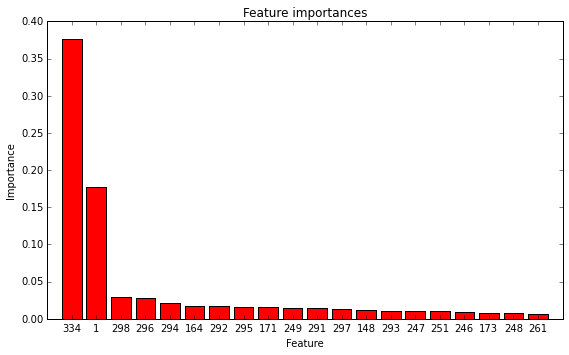

In [119]:
# Feature importances
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Number of features to show
n_features = 20

# Plot the feature importances
def plot_importances(clf, n_features=20):
    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(8,5))
    plt.bar(range(n_features), importances[indices[:n_features]],
            color="r", align="center")
    plt.xticks(range(n_features), indices)
    plt.xlim([-1, n_features])
    plt.title("Feature importances")
    plt.xlabel("Feature")
    plt.ylabel("Importance")
    plt.tight_layout()
    plt.show()

plot_importances(clf)

Feature importances drop fast after the first two most useful features. Plotting the top features shows this clearly. Next only 20 most important features are used for builiding a model in order to reduce random noise due to less useful features.

Training RandomForestClassifier...
Done!
Training time (secs): 8.239
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=676845, verbose=0,
            warm_start=False)
Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 1.191
AUC score for training set: 0.985269525376
Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 0.467
AUC score for test set: 0.541893920535


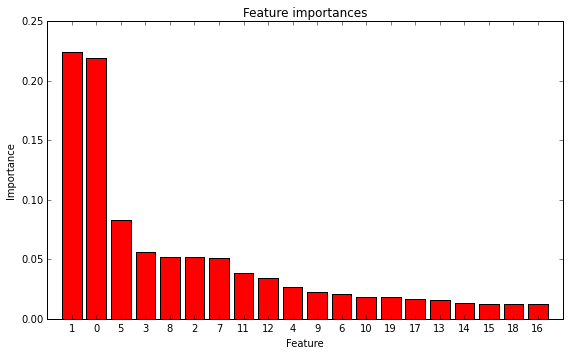

In [120]:
# Select features

# Use only most important features
n_features = 20
train_X_subset = train_X[indices[:n_features]]
test_X_subset = test_X[indices[:n_features]]

# Create random forest classifier
clf = RandomForestClassifier(n_estimators=100, class_weight="balanced", 
                            random_state=random_state)

# Train and display random forest
train_classifier(clf, train_X_subset, train_y)
print clf

train_auc_roc_score = predict_labels(clf, train_X_subset, train_y)
print "AUC score for training set: {}".format(train_auc_roc_score)

test_auc_roc_score = predict_labels(clf, test_X_subset, test_y)
print "AUC score for test set: {}".format(test_auc_roc_score)

plot_importances(clf)

Reducing the number of features to use for prediction to only the 20 most important features improved AUC score both on training set (from 0.950 to 0.985) and test set (from 0.520 to 0.542). Balanced class weights are used due to very imbalanced number of cases from different TARGET classes. Another approach to reduce overfitting is dimension reduction in the hopes of improving signal to noise ratio of the data.

[[  4.00003204e-11  -1.09654552e-09  -1.64622748e-07 ...,   2.81733840e-09
    2.08071315e-09  -1.19885779e-06]
 [ -9.61494650e-11  -9.80182047e-10  -7.17129793e-08 ...,  -2.52864062e-06
   -2.03031545e-06  -5.69018627e-07]
 [  1.54578938e-10   9.80732551e-10  -1.28242393e-08 ...,  -1.48850951e-07
   -1.16827445e-07   8.28199528e-07]
 ..., 
 [  0.00000000e+00   3.69234993e-17  -8.63574786e-19 ...,   1.89322824e-18
   -2.16989885e-18  -4.17726209e-21]
 [  0.00000000e+00   1.01777755e-09   1.38735812e-11 ...,   4.72521328e-13
    3.12419361e-13  -2.72004641e-15]
 [  0.00000000e+00   1.13007767e-09  -9.04432471e-12 ...,   3.12596476e-12
   -4.57805148e-12  -4.09117185e-14]]


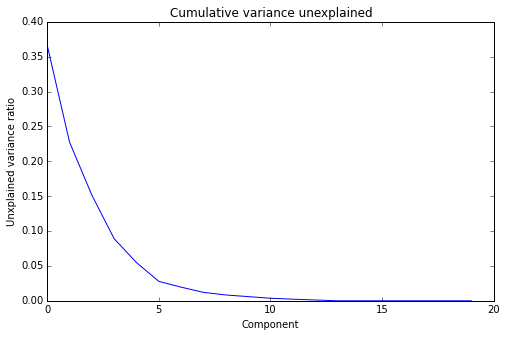

In [121]:
# Dimension reduction, all dimensions
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=train_X.shape[1])
pca.fit(train_X)

# Print the components and the amount of variance in the data contained in each dimension
print pca.components_

# Figure on variance explained
x = range(20)
y = 1 - np.cumsum(pca.explained_variance_ratio_[:20])
plt.figure(figsize=(8,5))
plt.clf()
plt.plot(x, y)
plt.title("Cumulative variance unexplained")
plt.xlabel("Component")
plt.ylabel("Unxplained variance ratio")
plt.show()

Applying principal component analysis (PCA) on training data and plotting the fraction of variance explained drops to practically zero with only 15 components. Next number of data dimensions is reduced to 15 using PCA.

In [122]:
# Dimension reduction, less dimensions
pca = PCA(n_components = 15)
pca.fit(train_X)

# Transform data
reduced_train_X = pca.fit_transform(train_X)
reduced_test_X = pca.transform(test_X)

print reduced_train_X.shape
print reduced_test_X.shape

(53214, 15)
(22806, 15)


Training RandomForestClassifier...
Done!
Training time (secs): 8.666
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=676845, verbose=0,
            warm_start=False)
Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 1.175
AUC score for training set: 0.971875879782
Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 0.487
AUC score for test set: 0.549657050228


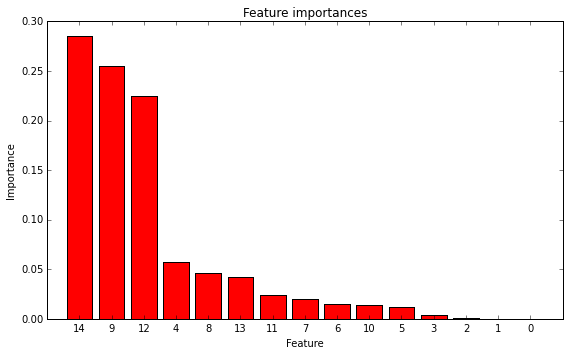

In [123]:
# Random forest with reduced dimensionality
clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', 
                            random_state=random_state)

train_classifier(clf, reduced_train_X, train_y)
print clf

train_auc_roc_score = predict_labels(clf, reduced_train_X, train_y)
print "AUC score for training set: {}".format(train_auc_roc_score)

test_auc_roc_score = predict_labels(clf, reduced_test_X, test_y)
print "AUC score for test set: {}".format(test_auc_roc_score)

plot_importances(clf, n_features=15)

Reducing dimensionality provides another small improvement on AUC score on test set, from 0.542 to 0.550. Comparing feature importances suggests that dimension reduction better captures all available information than using just raw most important features: the two least important PCA features are practically useless, while least important features of top 20 raw features still contain information. Next step is to optimize Random Forest Classifier in terms of number of estimators, maximum depth of trees and maximum number of features to consider at each split.  

In [125]:
# Grid search for optimal maximum depth and maximum number of features
from sklearn.grid_search import GridSearchCV

rfc = RandomForestClassifier(class_weight="balanced", n_estimators=100, 
                            random_state=random_state)
parameters = {'max_depth': [None, 2, 4, 8, 16], 
              'max_features': [2, 4, 8, 15]}

clf = GridSearchCV(rfc, parameters)
train_classifier(clf, reduced_train_X, train_y)

# Print optimal random forest
print clf.best_estimator_

train_auc_roc_score = predict_labels(clf, reduced_train_X, train_y)
print "AUC score for training set: {}".format(train_auc_roc_score)

test_auc_roc_score = predict_labels(clf, reduced_test_X, test_y)
print "AUC score for test set: {}".format(test_auc_roc_score)

Training GridSearchCV...
Done!
Training time (secs): 417.874
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features=8,
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=676845, verbose=0,
            warm_start=False)
Predicting labels using GridSearchCV...
Done!
Prediction time (secs): 1.063
AUC score for training set: 0.971875879782
Predicting labels using GridSearchCV...
Done!
Prediction time (secs): 0.459
AUC score for test set: 0.549391911471


Comment on grid search random forest

In [128]:
# Grid search for optimal number of estimators
rfc = RandomForestClassifier(class_weight="balanced", max_depth=None,
                             max_features=8, random_state=random_state)
parameters = {'n_estimators': [100, 200, 300]}

clf = GridSearchCV(rfc, parameters)
train_classifier(clf, reduced_train_X, train_y)

# Print optimal random forest
print clf.best_estimator_

train_auc_roc_score = predict_labels(clf, reduced_train_X, train_y)
print "AUC score for training set: {}".format(train_auc_roc_score)

test_auc_roc_score = predict_labels(clf, reduced_test_X, test_y)
print "AUC score for test set: {}".format(test_auc_roc_score)

Training GridSearchCV...
Done!
Training time (secs): 236.852
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features=8,
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=676845, verbose=0,
            warm_start=False)
Predicting labels using GridSearchCV...
Done!
Prediction time (secs): 1.098
AUC score for training set: 0.971875879782
Predicting labels using GridSearchCV...
Done!
Prediction time (secs): 0.473
AUC score for test set: 0.549391911471


According to grid search the optimal parameters for Random Forest classifier are number of estimators: 100, maximum depth: unlimited, and maximum number of features to consider at each split: 8. These parameter values are next used on the full training dataset to prepare a submission for Kaggle competition, although there is no big improvement over default values in AUC scores. 

In [129]:
# Optimal random forest on full data
train_full_X = train_raw.drop(["ID", "TARGET"], axis=1)
train_full_y = train_raw["TARGET"]

test = test_raw.drop(["ID"], axis=1)
test_ID = test_raw["ID"]

# Dimension reduction
reduced_train_full_X = pca.transform(train_full_X)
reduced_test = pca.transform(test)


clf = RandomForestClassifier(n_estimators = 100, class_weight='balanced',
                            max_depth=None, max_features=8)

train_classifier(clf, reduced_train_full_X, train_full_y)
print clf

Training RandomForestClassifier...
Done!
Training time (secs): 33.069
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features=8,
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


Finally, the optimal Random Forest classifier trained on full dataset is used for making predictions on test data provided by Kaggle.

In [130]:
# Predict on Kaggle test set
test_pred = clf.predict_proba(reduced_test)[:,1]
# Create submission
submission = pd.DataFrame({"ID":test_ID, "TARGET":test_pred})
submission.to_csv("submission-fpr.csv", index=False)
print "Done!"

Done!


This submission scored 0.827418 (ranking 3158/4609) on the public leaderboard for Kaggle Santander competition. The score is well over all zeros benchmark at 0.50, and only slightly behind the top score 0.843972. 